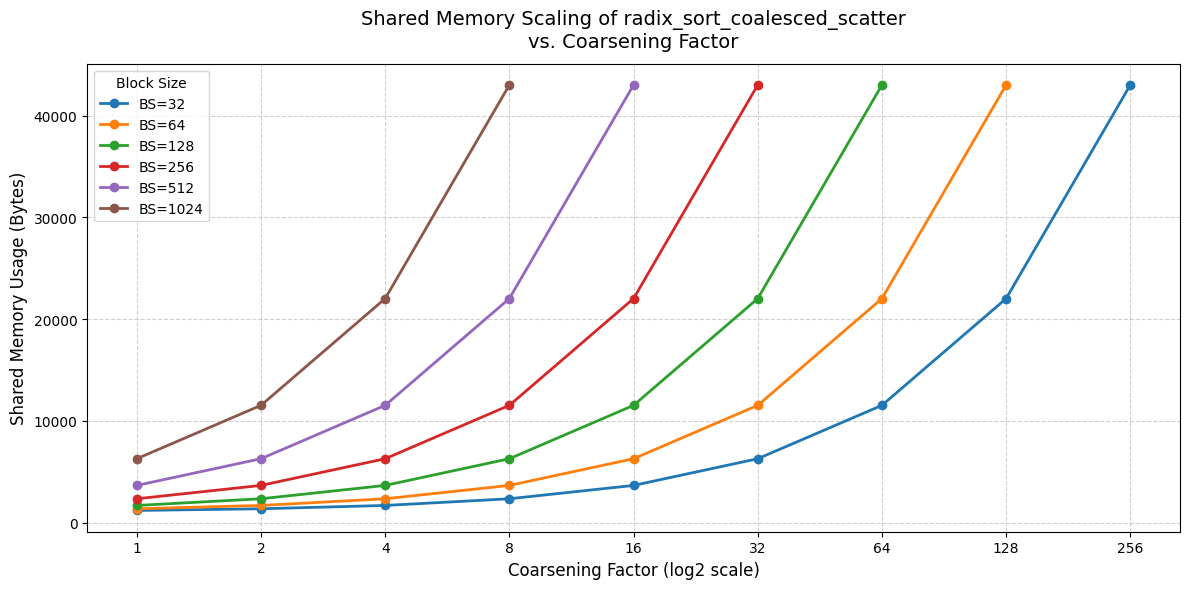

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Coarsening values (log2 spaced)
co = np.array([1, 2, 4, 8, 16, 32, 64, 128, 256])

# SHARED memory data (bytes) for radix_sort_coalesced_scatter
shared_data = {
    32:   [1204, 1368, 1696, 2352, 3664, 6288, 11536, 22032, 43024],
    64:   [1368, 1696, 2352, 3664, 6288, 11536, 22032, 43024, np.nan],
    128:  [1696, 2352, 3664, 6288, 11536, 22032, 43024, np.nan, np.nan],
    256:  [2352, 3664, 6288, 11536, 22032, 43024, np.nan, np.nan, np.nan],
    512:  [3664, 6288, 11536, 22032, 43024, np.nan, np.nan, np.nan, np.nan],
    1024: [6288, 11536, 22032, 43024, np.nan, np.nan, np.nan, np.nan, np.nan],
}

plt.figure(figsize=(12, 6))

for bs, shared in shared_data.items():
    plt.plot(
        co,
        shared,
        marker="o",
        linewidth=2,
        markersize=6,
        label=f"BS={bs}"
    )

plt.xscale("log", base=2)
plt.xticks(co, labels=[str(x) for x in co])

plt.xlabel("Coarsening Factor (log2 scale)", fontsize=12)
plt.ylabel("Shared Memory Usage (Bytes)", fontsize=12)

plt.title(
    "Shared Memory Scaling of radix_sort_coalesced_scatter\n"
    "vs. Coarsening Factor",
    fontsize=14,
    pad=12
)

plt.grid(True, which="both", linestyle="--", linewidth=0.8, alpha=0.6)
plt.legend(title="Block Size", fontsize=10)

plt.tight_layout()
plt.savefig('5.png', dpi=150)
plt.show()
